In [1]:
import tensorflow as tf
import numpy as np

In [11]:
def load_data():
    (x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
    x_train = x_train.astype('float32') / 255
    x_test = x_test.astype('float32') / 255
    # convert labels to categorical samples
    y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
    y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)
    return ((x_train, y_train), (x_test, y_test))
(x_train, y_train), (x_test, y_test) = load_data()

In [18]:
x_train[0].shape

(28, 28)

In [163]:
# Define a dummy model with Conv2D and MaxPool2D layers
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dropout, Input, Dense, Conv2D, MaxPool2D, LeakyReLU
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.optimizers import SGD
rate = 0.1
model = Sequential([
    Input((28, 28, 1)),
    Conv2D(8, (3, 3), activation=LeakyReLU(alpha=0.01)),
    Conv2D(8, (3, 3), activation=LeakyReLU(alpha=0.01)),
    Conv2D(16, (3, 3), activation=LeakyReLU(alpha=0.01)),
    Conv2D(16, (3, 3), activation=LeakyReLU(alpha=0.01)),
    MaxPool2D((2, 2)),
    Flatten(),
    Dropout(rate),
    Dense(64, activation=LeakyReLU(alpha=0.01)),
    Dense(10, activation='softmax')
])

In [159]:
# Print the model summary

model.summary()

Model: "sequential_29"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_109 (Conv2D)          (None, 26, 26, 8)         80        
_________________________________________________________________
conv2d_110 (Conv2D)          (None, 24, 24, 8)         584       
_________________________________________________________________
conv2d_111 (Conv2D)          (None, 22, 22, 16)        1168      
_________________________________________________________________
conv2d_112 (Conv2D)          (None, 20, 20, 16)        2320      
_________________________________________________________________
max_pooling2d_32 (MaxPooling (None, 10, 10, 16)        0         
_________________________________________________________________
flatten_13 (Flatten)         (None, 1600)              0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 1600)            

In [162]:
model.compile(optimizer=SGD(learning_rate=0.01), loss=CategoricalCrossentropy(), metrics=['accuracy'])
history = model.fit(x_train[..., np.newaxis], y_train, batch_size=256, epochs=40, validation_data=(x_test[..., np.newaxis], y_test), verbose=False)
history.history['val_accuracy'][-1]

0.8808000087738037

In [164]:
model.compile(optimizer=SGD(learning_rate=0.01), loss=CategoricalCrossentropy(), metrics=['accuracy'])
history = model.fit(x_train[..., np.newaxis], y_train, batch_size=256, epochs=40, validation_data=(x_test[..., np.newaxis], y_test), verbose=False)
history.history['val_accuracy'][-1]

KeyboardInterrupt: 

In [83]:
optimal_dropout_rate = 0.5
max_acc = 0.9
print(f'Looping through dropout rates of {[x/10 for x in range(1, 10)]}')
print('I have found that the maximum validation accuracy is found at:')
print(f'Optimal Dropout Rate: {optimal_dropout_rate}')
print(f'Maximum Accuracy Achieved: {max_acc}')


Looping through dropout rates of [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
I have found that the maximum validation accuracy is found at:
Optimal Dropout Rate: 0.5
Maximum Accuracy Achieved: 0.9


TensorShape([28, 28, 1])

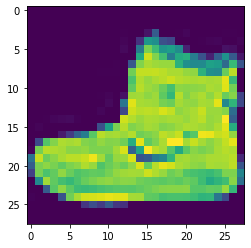

In [232]:
image = tf.convert_to_tensor(x_train[0][..., np.newaxis])
plt.imshow(image)
image.shape

In [233]:
model.layers[4].name

'max_pooling2d_33'

In [234]:
from tensorflow.keras.models import Model
inputs = model.inputs
outputs = model.outputs
model_features = Model(inputs=inputs, outputs=outputs)
inputs

[<tf.Tensor 'input_20:0' shape=(None, 28, 28, 1) dtype=float32>]

In [235]:
features = model_features(image)
features = [image] + features

InvalidArgumentError: Computed output size would be negative: -1 [input_size: 1, effective_filter_size: 3, stride: 1] [Op:Conv2D]

2.2.1

In [194]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
dolphins_F_62x32 = np.load('dolphins_F_62x32.npy')
dolphins_A_62x62 = np.load('dolphins_A_62x62.npy')
dolphin_names = pd.read_csv('dolphin_names.csv', index_col = 0)

In [113]:
dolphin_names.head()

,name
0,Beak
1,Beescratch
2,Bumper
3,CCL
4,Cross


In [105]:
def pairwise_distances(points):
    '''
    parameters:
    points: N x D array of points, where N is the number of points and
            D is the number of features.
    
    returns:
    distance: N x N array such that the element (i, j) is the computed
              distance between i-th point and j-th point.
    '''
    N, D = points.shape
    distance = np.empty((N, N))
    
    # distance matrix will be symmetric, so avoid redundant computations.
    for i in range(N):
        distance[i, i] = 0
        for j in range(i + 1, N):
            d = np.sqrt(np.power(points[i, :] - points[j, :], 2).sum())
            distance[i, j] = d
            distance[j, i] = d    
    return distance


def average_linkage(distances, cluster_assignment, i, j):
    """
    This function computes the average linkage value between two clusters.
    
    parameters:
    distances: N x N array of pair-wise distances for the given points.
    cluster_assignment: N 1d array that assigns a cluster id for every point.
    i: int the first cluster id.
    j: int the second cluster id.
    
    returns:
    pair_distance.mean: The average distance between the two given clusters.
    """
    # Select the point indices of the first cluster.
    points_i = np.argwhere(cluster_assignment == i)
    # Select the point indices of the second cluster.
    points_j = np.argwhere(cluster_assignment == j)
    # Form a cartesian product between the indices in i and indices in j.
    pairs = np.array([[element_i.item(), element_j.item()]  for element_i in points_i for element_j in points_j])
    # Select the pair distances between the points in the two clusters from the distances matrix.
    pairs_distance = distances[pairs[:, 0], pairs[:, 1]]
    # Return the average
    return pairs_distance.mean()


def hierarchical_clustering(points, distances, linkage=average_linkage):
    """
    The hierarchical clustering algorithm start with every point as a single cluster and 
    each iteration merges two clusters into one. We may wish to store all the 
    intermediate clustering results with respect to the number of clusters left.

    parameters:
    points: A numpy array of points having the shape (N, D), 
            where N is the number of points and D is the number of features.
    distances: A numpy array with shape (N, N) such that the element (i, j) is the computed
               distance between i-th point and j-th point in X.
    linkage: A linkage function from the above to call to compute the linkage values between two clusters.

    returns:
    assignments: N x N array of which each row stores the clustering assignment at each level.
                 The first row, i.e. a[0, :], represents the highest level of clustering where all columns have the same index value.
                 The second row, i.e. a[1, :], represents all the points assigned into two cluster indices.
                 The last row, i.e. a[N - 1, :], represents the points assigned into N - 1 cluster indices.
    """ 
    N, D = points.shape
    assignments = np.zeros((N, N))
    
    # Begin with every point is its own cluster
    current_assignment = np.arange(N)
    
    # The id to be assigned for the next merged cluster
    next_cluster_id = N
    
    # Begin from level (N - 1) to level 1
    for level in range(N - 1, 0, -1):
        cluster_ids = np.unique(current_assignment)
        
        min_d = np.inf
        
        # Initialize the cluster ids to be merged in this iteration.
        cluster_a, cluster_b = (-1, -1) 
        
        # Now find the two clusters that have the minimum distance in between.
        for i in range(cluster_ids.size):
            for j in range(i + 1, cluster_ids.size):
                cluster_i = cluster_ids[i]
                cluster_j = cluster_ids[j]
                d = linkage(distances, current_assignment, cluster_i, cluster_j)    ## <-- EDIT THIS LINE
                if d < min_d:
                    min_d = d
                    cluster_a, cluster_b = (cluster_i, cluster_j)
        
        # Merge the two clusters
        current_assignment[(current_assignment == cluster_a) | (current_assignment == cluster_b)] = next_cluster_id
        next_cluster_id += 1
        # Store the current cluster assignment into the assignments array.
        assignments[level, :] = current_assignment
        
    return assignments

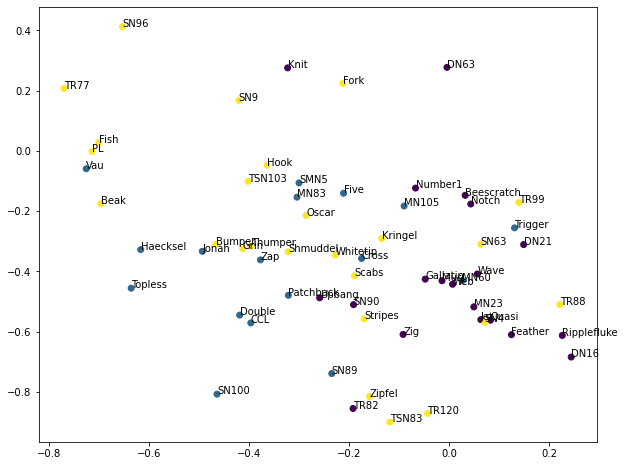

In [122]:
X = dolphins_F_62x32*1.0
d = pairwise_distances(X)
a = hierarchical_clustering(X, d)
plt.figure(figsize=(10,8))
plt.scatter(X[:,0], X[:,1], c=a[3,:])
for i, (x, y, label) in enumerate(zip(X[:, 0], X[:, 1], np.squeeze(dolphin_names.to_numpy()))):
    plt.annotate(label, xy=(x, y))
plt.show()

In [206]:
X = dolphins_F_62x32*1.0
A = dolphins_A_62x62*1.0
d = pairwise_distances(X)
a = hierarchical_clustering(X, d)


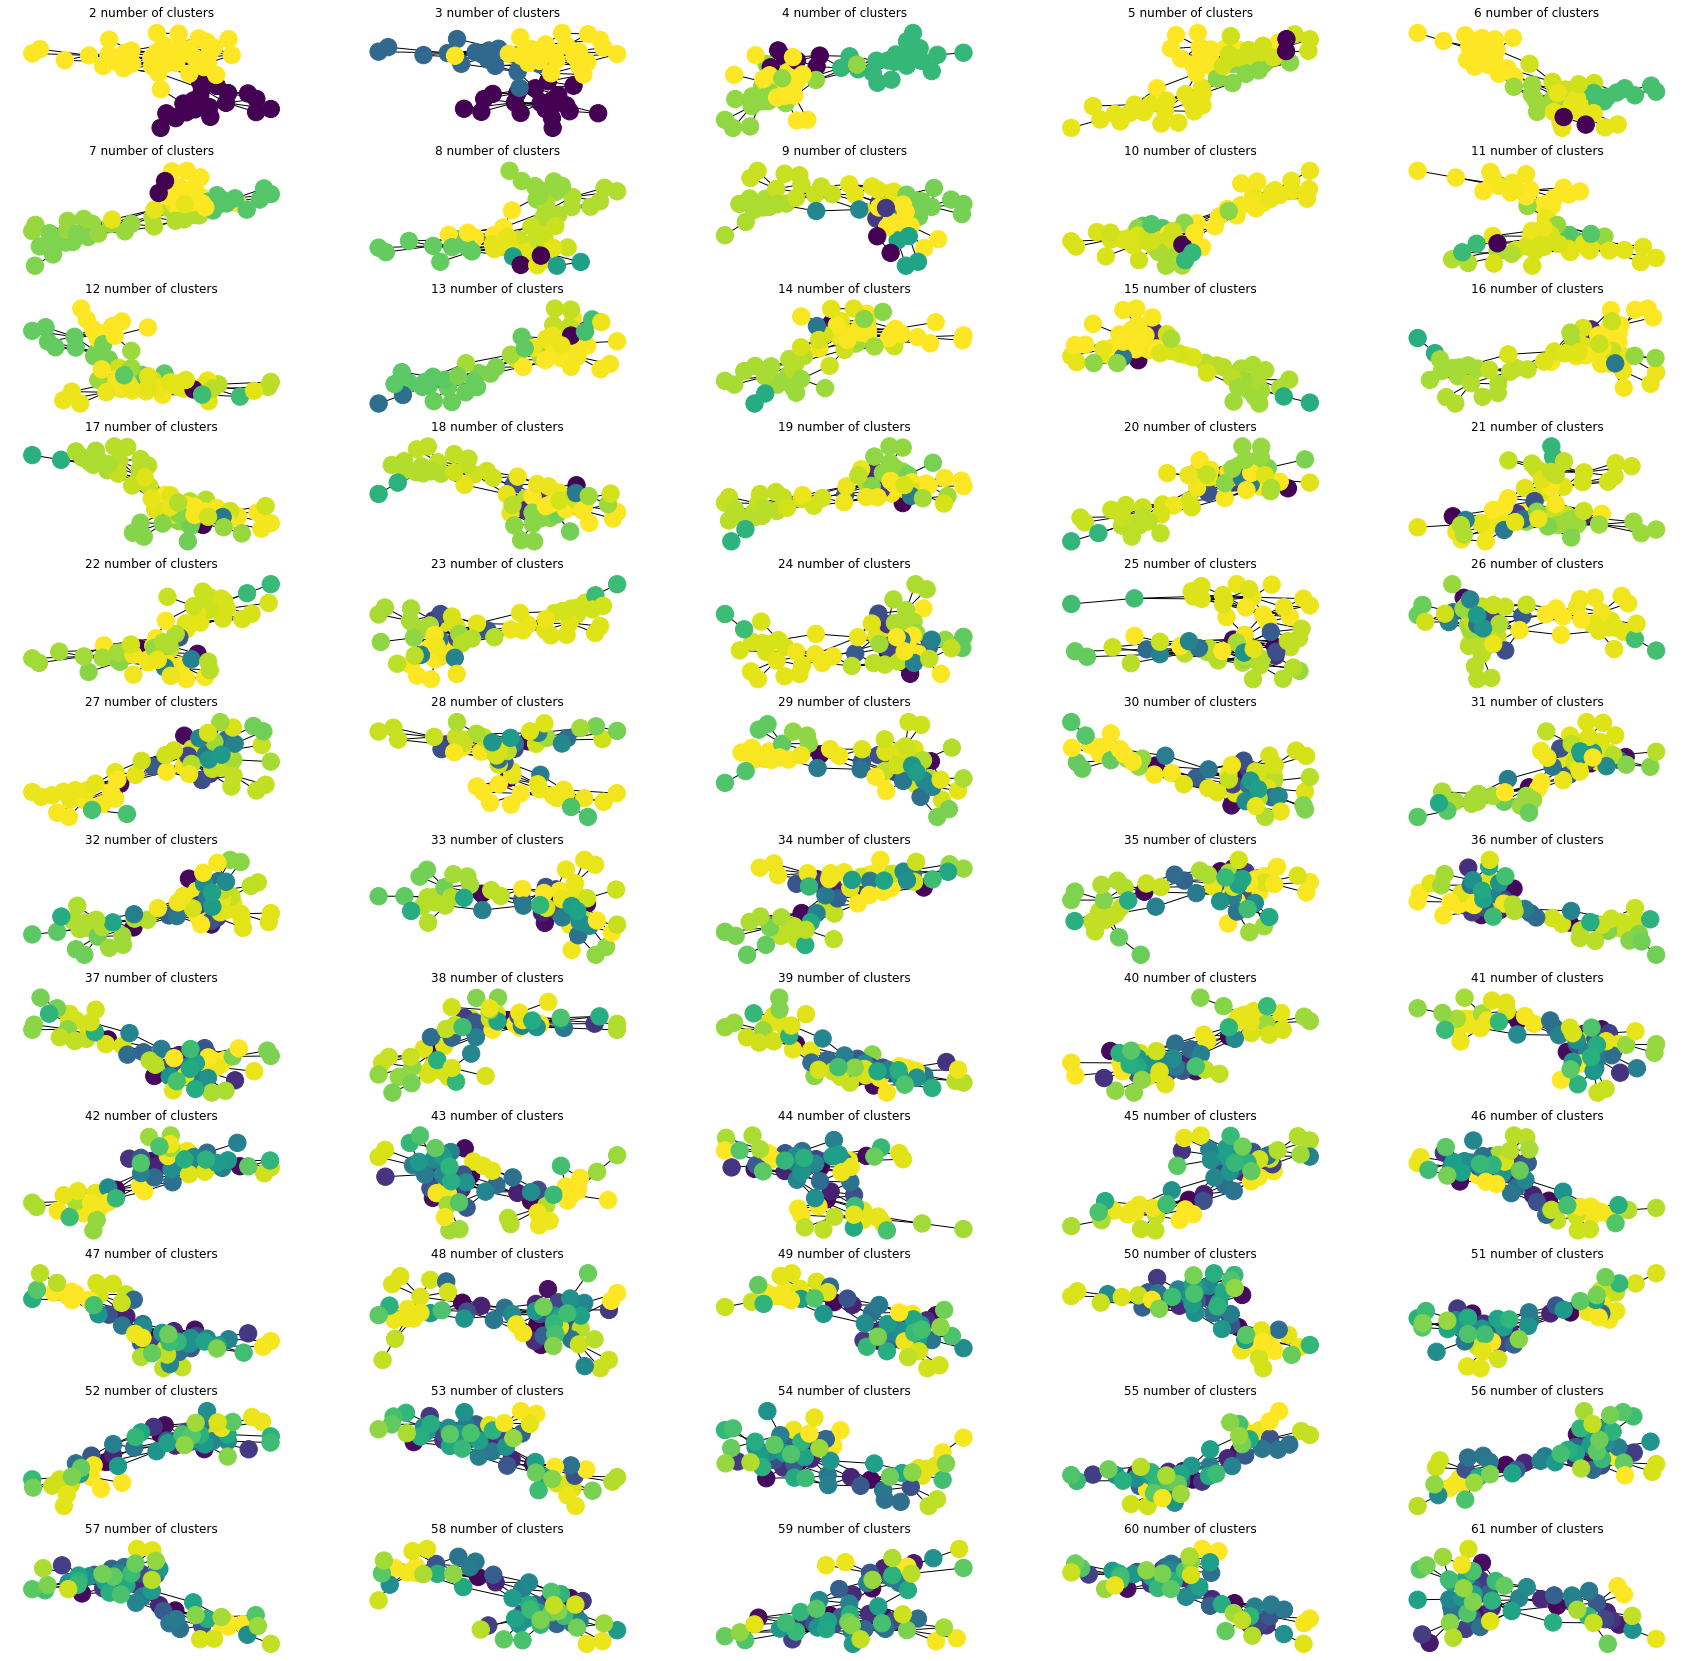

In [237]:
nrow = 12; ncol = 5;
fig, axs = plt.subplots(nrows=nrow, ncols=ncol,figsize=(30,30))

for i,ax in enumerate(axs.reshape(-1)): 
    ax.set_title(f'Separated into {i+2} clusters')
    nx.draw(nx.from_numpy_array(A), node_color=a[i+2], ax=ax)




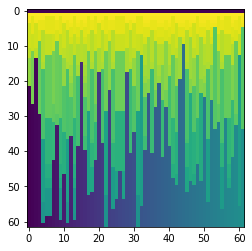

In [193]:
from scipy.cluster.hierarchy import dendrogram

plt.figure()
plt.imshow(a)